In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/My Drive/bigcontest

/content/gdrive/My Drive/bigcontest


In [3]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [148]:
d2018_1 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv", encoding=  'cp949')
d2019_1 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv", encoding=  'cp949')
d2020_1 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv", encoding=  'cp949')
d2021_1 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv", encoding=  'cp949')

In [149]:
d2018_3 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv")
d2019_3 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv")
d2020_3 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv")

In [150]:
d2018_3['OBP'] = d2018_3[['HIT', 'BB']].sum(axis = 1) / d2018_3[['AB', 'BB', 'SF']].sum(axis =1)
d2019_3['OBP'] = d2019_3[['HIT', 'BB']].sum(axis = 1) / d2019_3[['AB', 'BB', 'SF']].sum(axis =1)

In [151]:
d2018_3['OPS'] = d2018_3[['OBP', 'SLG']].sum(axis = 1)
d2019_3['OPS'] = d2019_3[['OBP', 'SLG']].sum(axis = 1)

In [6]:
d2018_1.head()

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척


In [8]:
d2018_1['DATE'] = d2018_1['G_ID'].str[:8]

In [11]:
d2018_1['DATE'] = pd.to_datetime(d2018_1['DATE'])

In [12]:
d2018_1['GMONTH'] = d2018_1['DATE'].dt.month

In [13]:
d2018_1['GDAY'] = d2018_1['DATE'].dt.day

### sample modeling

In [78]:
samp_train = pd.crosstab(d2018_1['PCODE'], d2018_1['G_ID'], values = d2018_1['HIT_RESULT'], aggfunc = 'nunique').fillna(0)

In [79]:
samp_train /= 255.0

In [80]:
samp_train = samp_train.reset_index()

In [82]:
samp_train = pd.merge(samp_train, d2018_3[['PCODE', 'OPS']], how = 'left', on = 'PCODE')

In [83]:
samp_train.head()

,PCODE,20180324HHWO0,20180324KTHT0,20180324LGNC0,20180324LTSK0,20180324SSOB0,20180325HHWO0,20180325KTHT0,20180325LGNC0,20180325LTSK0,20180325SSOB0,20180327HHNC0,20180327KTSK0,20180327LGWO0,20180327LTOB0,20180327SSHT0,20180328HHNC0,20180328KTSK0,20180328LGWO0,20180328LTOB0,20180328SSHT0,20180329HHNC0,20180329KTSK0,20180329LGWO0,20180329LTOB0,20180329SSHT0,20180330HTLG0,20180330NCLT0,20180330OBKT0,20180330SKHH0,20180330WOSS0,20180331HTLG0,20180331NCLT0,20180331OBKT0,20180331SKHH0,20180331WOSS0,20180401HTLG0,20180401NCLT0,20180401OBKT0,20180401SKHH0,...,20180930HHHT0,20180930LGOB0,20180930LTKT0,20180930NCWO0,20180930SKSS0,20181002KTLG0,20181002LTSK0,20181002NCHT0,20181003HTSS0,20181003KTLG0,20181003LTHH0,20181004HTSK0,20181004LTHH0,20181006HHLT0,20181006HTSK1,20181006HTSK2,20181006LGOB0,20181006SSKT0,20181006WONC0,20181007HTOB0,20181007LTNC0,20181009HHKT0,20181009HTLT0,20181009SSSK0,20181010HHHT0,20181010KTLT1,20181010KTLT2,20181010SKOB0,20181011LTHT0,20181011SKOB0,20181012LTHT0,20181012NCOB0,20181012WOKT0,20181013KTOB0,20181013LGSK0,20181013LTHT0,20181013NCHH0,20181013WOSS0,20181014OBLT0,OPS
0,60100,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.000000,0.011765,0.0,0.0,0.0,0.000000,0.007843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.710970
1,60184,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
2,60288,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,60343,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.007843,0.000000,0.0,0.0,0.0,0.015686,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.641941
4,60456,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.125000


In [162]:
samp_test = pd.crosstab(d2019_1['PCODE'], d2019_1['G_ID'], values = d2019_1['HIT_RESULT'], aggfunc = 'nunique').fillna(0)

In [163]:
samp_test /= 255.0

In [164]:
samp_test['add_col1'] = 0
samp_test['add_col2'] = 0

In [165]:
samp_test = samp_test.reset_index()

In [166]:
samp_test = pd.merge(samp_test, d2019_3[['PCODE', 'OPS']], how = 'left', on = 'PCODE')

In [167]:
samp_test.head()

,PCODE,20190323HHOB0,20190323KTSK0,20190323LGHT0,20190323SSNC0,20190323WOLT0,20190324HHOB0,20190324KTSK0,20190324LGHT0,20190324SSNC0,20190324WOLT0,20190326HHHT0,20190326KTNC0,20190326LGSK0,20190326SSLT0,20190326WOOB0,20190327HHHT0,20190327KTNC0,20190327LGSK0,20190327SSLT0,20190327WOOB0,20190328HHHT0,20190328KTNC0,20190328LGSK0,20190328SSLT0,20190328WOOB0,20190329HTKT0,20190329LTLG0,20190329NCHH0,20190329OBSS0,20190329SKWO0,20190330HTKT0,20190330LTLG0,20190330NCHH0,20190330OBSS0,20190330SKWO0,20190331HTKT0,20190331LTLG0,20190331NCHH0,20190331OBSS0,...,20190919OBSK1,20190919OBSK2,20190920HTOB0,20190920KTLT0,20190920SSHH0,20190920WOSK0,20190921HTOB0,20190921SSKT0,20190922LGOB0,20190923HHLG0,20190923HTKT0,20190923NCLT0,20190924OBNC0,20190924SKKT0,20190924SSLG0,20190924WOHT0,20190925HHNC0,20190925OBLT0,20190925SSSK0,20190926HHNC0,20190926HTLT0,20190926LGKT0,20190926OBSS0,20190927NCLG0,20190927SKSS0,20190928HHOB0,20190928LGHT0,20190928NCKT0,20190928SKSS0,20190929OBLG0,20190929SKHH0,20190929SSKT0,20190929WOLT0,20190930LTLG0,20190930SKHH0,20191001NCOB0,20191001WOLT0,add_col1,add_col2,OPS
0,60100,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0,0,0.522273
1,60288,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0,0,0.538769
2,60343,0.0,0.003922,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.003922,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0,0,0.291667
3,60523,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.000000,0.0,0.0,0.0,0.007843,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.007843,0.0,0.0,0.007843,0,0,0.597411
4,60558,0.0,0.007843,0.0,0.0,0.0,0.0,0.007843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.007843,0.0,0.0,0.0,0.007843,0.0,0.0,0.0,0.0,0.011765,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.003922,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,0.0,0.000000,0.0,0.0,0.000000,0,0,0.661091


In [110]:
X = np.array(samp_train.iloc[:, 1:-1]).reshape(samp_train.shape[0], *(35, 20, 1))

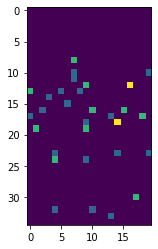

In [172]:
plt.imshow(X[20].reshape(35, 20))

In [85]:
y = samp_train['OPS']

In [168]:
target = np.array(samp_test.iloc[:, 1:-1]).reshape(samp_test.shape[0], *(35, 20, 1))

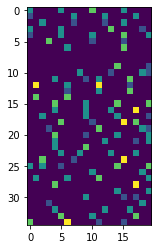

In [171]:
plt.imshow(target[200].reshape(35, 20))

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, Dense, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_squared_error

In [186]:
model = Sequential()
model.add(Conv2D(64, 3, 3, padding = 'same', activation = 'relu', input_shape = (35, 20, 1)))
model.add(BatchNormalization())
model.add(Dropout(.3))
model.add(Conv2D(64, 3, 3, padding = 'same', activation = 'relu'))
model.add(Dropout(.2))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1))

In [187]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 12, 7, 64)         640       
_________________________________________________________________
batch_normalization_20 (Batc (None, 12, 7, 64)         256       
_________________________________________________________________
dropout_31 (Dropout)         (None, 12, 7, 64)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 3, 64)          36928     
_________________________________________________________________
dropout_32 (Dropout)         (None, 4, 3, 64)          0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 1, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 128)             

In [188]:
model.compile(loss = 'mse', optimizer = RMSprop(learning_rate = .003))

In [189]:
history = model.fit(X, y, epochs = 30, batch_size = 16, validation_split = .2, verbose = 1)

Epoch 1/30
14/14 [==============================] - 1s 20ms/step - loss: 0.2732 - val_loss: 0.0709
Epoch 2/30
14/14 [==============================] - 0s 8ms/step - loss: 0.0830 - val_loss: 0.0687
Epoch 3/30
14/14 [==============================] - 0s 9ms/step - loss: 0.0702 - val_loss: 0.0574
Epoch 4/30
14/14 [==============================] - 0s 8ms/step - loss: 0.0665 - val_loss: 0.0581
Epoch 5/30
14/14 [==============================] - 0s 7ms/step - loss: 0.0643 - val_loss: 0.0578
Epoch 6/30
14/14 [==============================] - 0s 7ms/step - loss: 0.0724 - val_loss: 0.0570
Epoch 7/30
14/14 [==============================] - 0s 7ms/step - loss: 0.0607 - val_loss: 0.0569
Epoch 8/30
14/14 [==============================] - 0s 9ms/step - loss: 0.0620 - val_loss: 0.0569
Epoch 9/30
14/14 [==============================] - 0s 7ms/step - loss: 0.0554 - val_loss: 0.0578
Epoch 10/30
14/14 [==============================] - 0s 7ms/step - loss: 0.0644 - val_loss: 0.0670
Epoch 11/30
14/14 

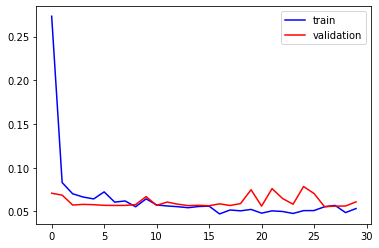

In [190]:
plt.plot(history.history['loss'], label = 'train', color = 'b')
plt.plot(history.history['val_loss'], label = 'validation', color = 'r')
plt.legend()
plt.show()

In [191]:
pred = model.predict(target)

In [192]:
pred = [p[0] for p in pred]

In [193]:
rmse = np.sqrt(mean_squared_error(samp_test['OPS'], pred))

In [194]:
rmse

0.21854066469067376

In [195]:
samp_test['OPS'].min(), samp_test['OPS'].max()

(0.0, 1.3336666666666668)

### 추가 아이디어

In [ ]:
hit_ct = pd.crosstab(d2018_1['PCODE'], d2018_1['HIT_RESULT'], aggfunc = 'mean', values = d2018_1['HIT_VEL']).fillna(0)

In [ ]:
hit_inn = pd.crosstab(d2018_1['PCODE'], d2018_1['HIT_RESULT'], aggfunc = 'mean', values = d2018_1['INN']).fillna(0)

In [ ]:
hit_st = pd.crosstab(d2018_1['PCODE'], d2018_1['STADIUM'], aggfunc = 'mean', values = d2018_1['HIT_VEL']).fillna(0)

In [ ]:
samp = pd.crosstab(d2018_1['PCODE'], d2018_1['HIT_RESULT'])

In [ ]:
samp = pd.merge(samp, d2018_3[['PCODE', 'OPS']], how = 'left')

In [ ]:
df = pd.concat([hit_ct, hit_inn, hit_st, samp], axis = 1, ignore_index = True)

In [ ]:
pd.concat([hit_ct, hit_inn, hit_st], axis =1 )

,1루타,2루타,3루타,내야안타(1루타),땅볼아웃,번트아웃,번트안타,병살타,야수선택,인필드플라이,직선타,파울플라이,플라이,홈런,희생번트,희생플라이,1루타,2루타,3루타,내야안타(1루타),땅볼아웃,번트아웃,번트안타,병살타,야수선택,인필드플라이,직선타,파울플라이,플라이,홈런,희생번트,희생플라이,고척,광주,대구,대전,마산,문학,사직,수원,잠실
PCODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60100,134.896667,143.512857,138.38,129.3800,125.556000,0.0,0.0,121.353333,0.00,0.00,152.090000,114.981429,131.437436,154.46000,0.00,144.530000,6.416667,4.928571,9.0,3.00,4.400000,0.0,0.0,3.333333,0.0,0.0,4.600000,6.857143,5.974359,5.000000,0.0,9.000000,123.402857,123.663333,0.000000,136.534667,136.310000,0.000000,123.955714,143.873333,133.665909
60184,135.570000,155.220000,0.00,0.0000,136.630000,0.0,0.0,0.000000,0.00,0.00,137.630000,0.000000,132.316667,0.00000,0.00,0.000000,8.000000,9.000000,0.0,0.00,8.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,6.000000,0.000000,0.0,0.000000,0.000000,0.000000,117.235000,0.000000,0.000000,0.000000,0.000000,141.232500,162.600000
60288,0.000000,0.000000,0.00,0.0000,74.480000,0.0,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.0,0.00,8.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.480000
60343,142.154783,154.017500,0.00,0.0000,113.767778,0.0,0.0,121.983333,111.16,134.57,0.000000,117.470000,136.610606,153.53750,0.00,0.000000,5.043478,5.500000,0.0,0.00,5.259259,0.0,0.0,5.666667,2.0,9.0,0.000000,6.000000,6.060606,4.500000,0.0,0.000000,142.536875,124.730000,144.200000,119.537500,130.241429,120.135000,118.105000,132.160784,130.274286
60456,112.885000,0.000000,0.00,108.8800,77.520000,0.0,0.0,0.000000,0.00,0.00,0.000000,0.000000,137.015000,0.00000,0.00,0.000000,8.000000,0.000000,0.0,6.00,8.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,4.000000,0.000000,0.0,0.000000,0.000000,116.030000,114.034000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,137.293333,0.000000,143.51,0.0000,0.000000,0.0,0.0,122.870000,0.00,0.00,0.000000,90.980000,142.095000,0.00000,0.00,0.000000,9.000000,0.000000,5.0,0.00,0.000000,0.0,0.0,2.000000,0.0,0.0,0.000000,7.000000,8.500000,0.000000,0.0,0.000000,147.140000,0.000000,122.870000,0.000000,0.000000,0.000000,0.000000,157.460000,125.192000
79608,137.136139,151.790541,143.69,129.1100,128.539079,0.0,0.0,140.680000,0.00,121.26,149.457333,112.148333,130.169760,151.61913,0.00,141.426667,4.712871,4.675676,1.0,3.80,4.447368,0.0,0.0,3.666667,0.0,6.0,4.133333,5.083333,5.016000,4.913043,0.0,5.111111,135.028000,136.286111,127.201304,136.628214,138.512800,134.254483,130.343571,143.627143,135.096190
79705,132.590769,153.135000,0.00,0.0000,129.820909,0.0,0.0,130.790000,0.00,0.00,121.305000,100.050000,132.632143,146.64500,34.35,0.000000,5.923077,4.500000,0.0,0.00,5.636364,0.0,0.0,2.000000,0.0,0.0,6.000000,2.500000,5.928571,3.500000,5.0,0.000000,149.480000,113.348333,0.000000,132.123333,0.000000,133.590000,145.350000,138.013333,131.044615


위 정보를 경기별로 생성해서 1경기당 발생하는 지표 * 경기 수 -> 영상 처럼 생각해서 conv2dlstm(애초에 영상용 알고리즘임)